# Analysis of data
In this notebook we'll look at the downloaded data and explore what it tells us

In [30]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas
from shapely.geometry import Point



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
geo_data_dir = '../data/geo_data'
weather_data_dir = '../data/weather_data'

### Load the taxi data

* Start with green taxi cab data as this is smaller

In [6]:
green_tripdata_file = '../data/taxi_data/consolidated_green_tripdata.csv'
yellow_tripdata_file = '../data/taxi_data/consolidated_yellow_tripdata.csv'

* Load the trip data for green cabs and get its size

In [9]:
green_tripdata = pd.read_csv(green_tripdata_file, delimiter=',')
print(green_tripdata.shape)

(10108112, 8)


* See a sample of green cab trip data

In [14]:
green_tripdata.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,total_amount
1,2,2017-07-01 00:56:23,2017-07-01 00:59:30,14,14,1,0.81,5.80
2,2,2017-07-01 00:15:25,2017-07-01 00:34:24,112,61,1,4.97,23.16
3,2,2017-07-01 00:55:06,2017-07-01 00:59:08,92,92,1,0.83,6.80
4,2,2017-07-01 00:34:05,2017-07-01 00:50:44,75,79,1,4.99,19.30
5,2,2017-07-01 00:09:19,2017-07-01 00:16:58,61,188,1,1.72,9.30
6,2,2017-07-01 00:24:20,2017-07-01 00:30:54,188,89,1,1.88,8.80
7,2,2017-07-01 00:41:22,2017-07-01 01:13:02,89,71,1,1.74,21.30
8,2,2017-07-01 00:20:02,2017-07-01 00:39:31,255,129,1,5.85,26.16
9,2,2017-07-01 00:46:38,2017-07-01 01:12:26,255,181,2,6.38,29.75
10,2,2017-07-01 00:07:32,2017-07-01 00:10:34,49,49,1,0.84,6.96


* Clean up the data by removing rows with NANs and '0' data

In [19]:
green_tripdata = green_tripdata[(green_tripdata != 0).all(1)].dropna()
print(green_tripdata.shape)

(9973737, 8)


* View green cab trip data again

In [21]:
green_tripdata.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,total_amount
1,2,2017-07-01 00:56:23,2017-07-01 00:59:30,14,14,1,0.81,5.80
2,2,2017-07-01 00:15:25,2017-07-01 00:34:24,112,61,1,4.97,23.16
3,2,2017-07-01 00:55:06,2017-07-01 00:59:08,92,92,1,0.83,6.80
4,2,2017-07-01 00:34:05,2017-07-01 00:50:44,75,79,1,4.99,19.30
5,2,2017-07-01 00:09:19,2017-07-01 00:16:58,61,188,1,1.72,9.30
6,2,2017-07-01 00:24:20,2017-07-01 00:30:54,188,89,1,1.88,8.80
7,2,2017-07-01 00:41:22,2017-07-01 01:13:02,89,71,1,1.74,21.30
8,2,2017-07-01 00:20:02,2017-07-01 00:39:31,255,129,1,5.85,26.16
9,2,2017-07-01 00:46:38,2017-07-01 01:12:26,255,181,2,6.38,29.75
10,2,2017-07-01 00:07:32,2017-07-01 00:10:34,49,49,1,0.84,6.96


* Save this data in its cleansed form for later

In [34]:
green_tripdata.to_csv('../data/taxi_data/cleansed_green_tripdata.csv', sep=',')

* Count of each pickup (PU) and drop-off (DO) location ID

In [35]:
green_count_by_PU = green_tripdata.groupby('PULocationID')['PULocationID'].count()
green_count_by_DO = green_tripdata.groupby('DOLocationID')['DOLocationID'].count()

### Render this data on a map of NYC

* Load the shape file of NYC (this contains the shape files for each location below) and display it

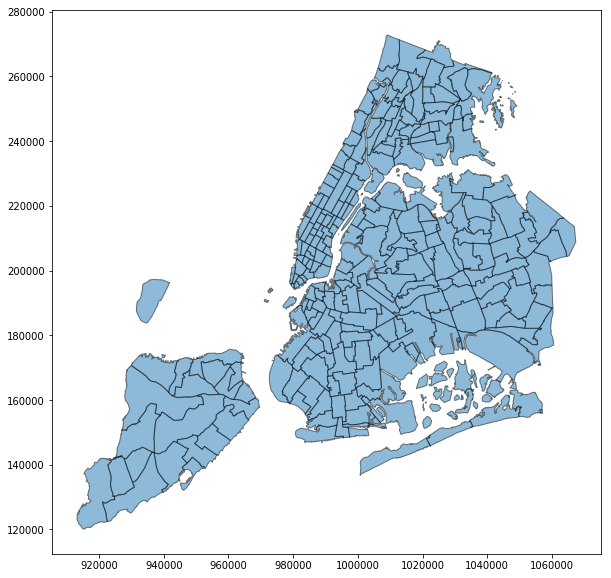

In [108]:
taxi_zones = geopandas.read_file('../data/taxi_zones')
taxi_zones.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

* This CRS will transform the map into lat/long coordinates

In [109]:
taxi_zones_crs = taxi_zones.crs
taxi_zones = taxi_zones.to_crs({'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True})

* Let's view the shape file from geopandas
(See http://geopandas.org/index.html)

In [110]:
taxi_zones.head(10)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445299999996 40.6949959999999,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,(POLYGON ((-73.82337597260663 40.6389870471767...
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,POLYGON ((-73.84792614099985 40.87134223399993...
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,POLYGON ((-73.97177410965318 40.72582128133706...
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,POLYGON ((-74.17421738099989 40.56256808599989...
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,POLYGON ((-74.06367318899999 40.60219816599994...
6,7,0.107417,0.000390,Astoria,7,Queens,POLYGON ((-73.90413637799996 40.76752031699986...
7,8,0.027591,0.000027,Astoria Park,8,Queens,POLYGON ((-73.92334041500001 40.77512891199993...
8,9,0.099784,0.000338,Auburndale,9,Queens,POLYGON ((-73.78502434699996 40.76103651599986...
9,10,0.099839,0.000436,Baisley Park,10,Queens,"POLYGON ((-73.7832662499999 40.68999429299992,..."


* Add the count by ID to the taxi_zone geo dataframe

In [111]:
taxi_zones['Count_by_PULocationID'] = green_count_by_PU
taxi_zones['Count_by_DOLocationID'] = green_count_by_DO

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/anaconda3/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Text(0.5,1,'Volume of Pickups by Location')

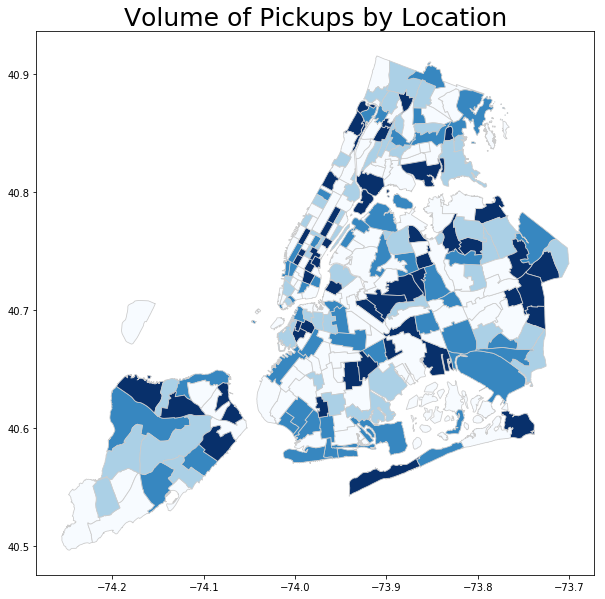

In [112]:
fig, ax = plt.subplots(1, figsize=(10, 10))
taxi_zones.plot(column='Count_by_PULocationID', cmap='Blues', scheme='quantiles', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('Volume of Pickups by Location', fontdict={'fontsize': 25, 'fontweight' : 3})

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/anaconda3/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Text(0.5,1,'Volume of Drop-offs by Location')

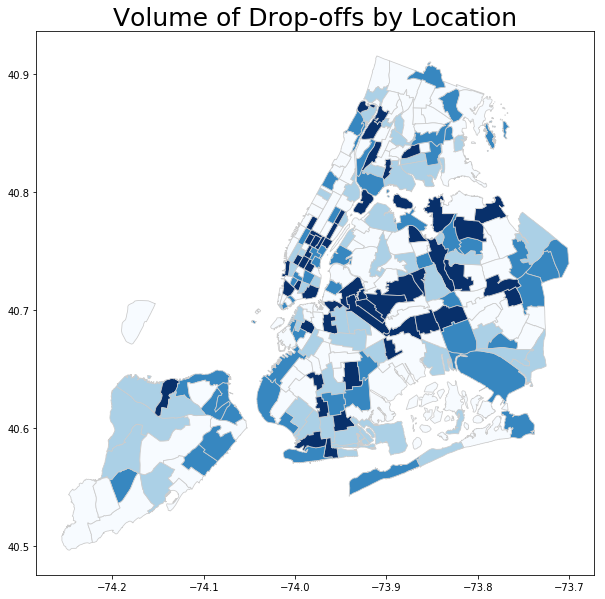

In [113]:
fig, ax = plt.subplots(1, figsize=(10, 10))
taxi_zones.plot(column='Count_by_DOLocationID', cmap='Blues', scheme='quantiles', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('Volume of Drop-offs by Location', fontdict={'fontsize': 25, 'fontweight' : 3})